The purpose of this notebook is to explore the GDC TCGA gene expression data.

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)
from setting import *
from plots_and_stats import *
from utils import *
from loader import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [2]:
name = 'BRCA'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

### Original dataset

The original gene expression unit is probably log2(raw count + 1). It is mentioned [here](https://xenabrowser.net/datapages/?dataset=TCGA-KIRC.htseq_counts.tsv&host=https%3A%2F%2Fgdc.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443
).

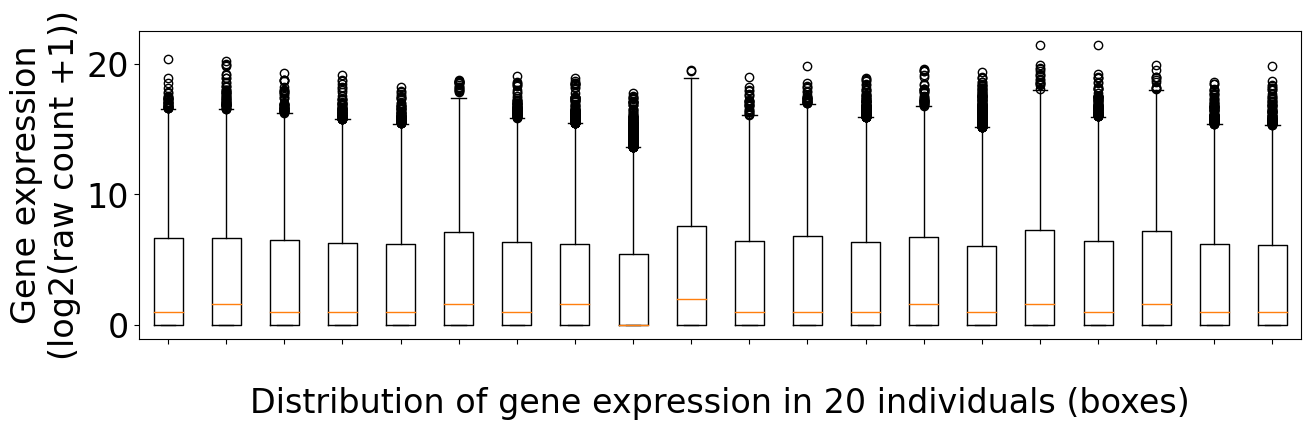

In [3]:
X, y, class_name, feat_name = load_data(data_path, name, 
                                        weakly_expressed_genes_removed=False, 
                                        ood_samples_removed=False, normalize_expression=False)

ylabel = f'Gene expression\n(log2(raw count +1))'
describe_random_individuals(X, ylabel)

### Normalised dataset

In our work, each sample is expressed in log2(norm_count+1), where norm_count means that the sum of the gene values per sample is $10^6$. Before this normalisation step, the genes that are weakly expressed are removed from the study (cf Scripts/Preprocessing/quality_control.py). 

44328 weakly expressed genes are removed of the dataset.


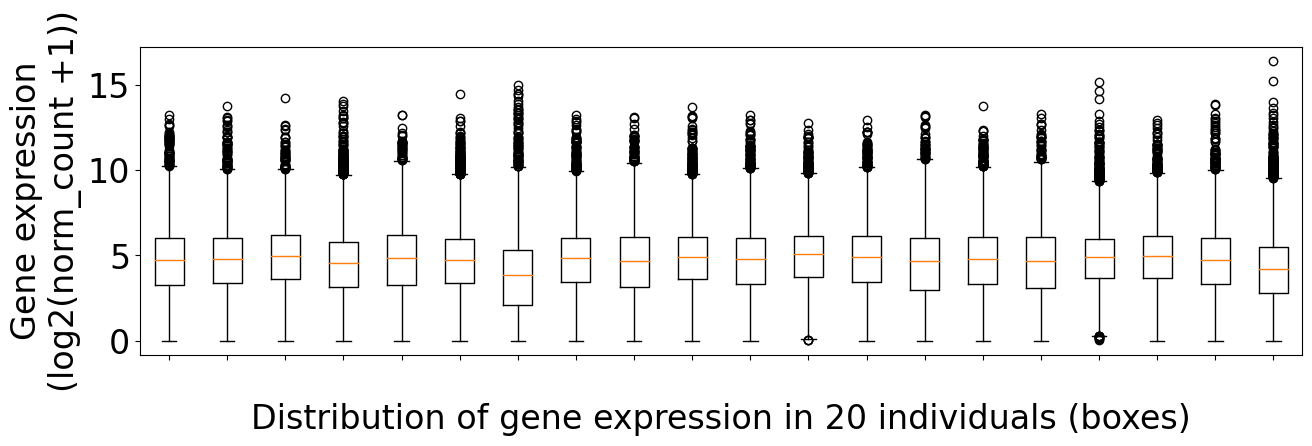

In [4]:
X, y, class_name, feat_name = load_data(data_path, name, 
                                        weakly_expressed_genes_removed=True, 
                                        ood_samples_removed=True, normalize_expression=True)
ylabel = f'Gene expression\n(log2(norm_count +1))'
describe_random_individuals(X, ylabel)

# Additional figures

### Distribution of the values of gene expression

Mean:  71.71
Median:  26.82
Max:  175293.38
Min:  0.0
Number of times the expression of a gene is equal to 0: 30414


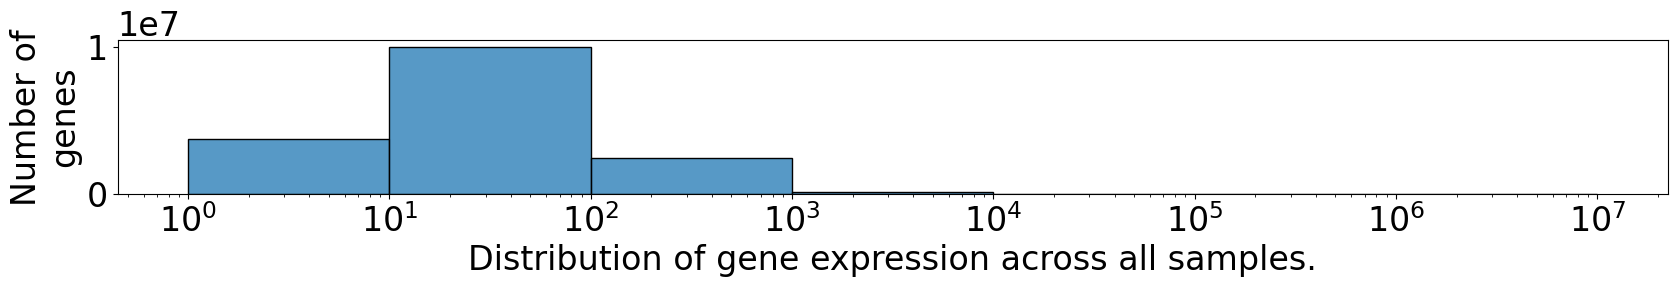

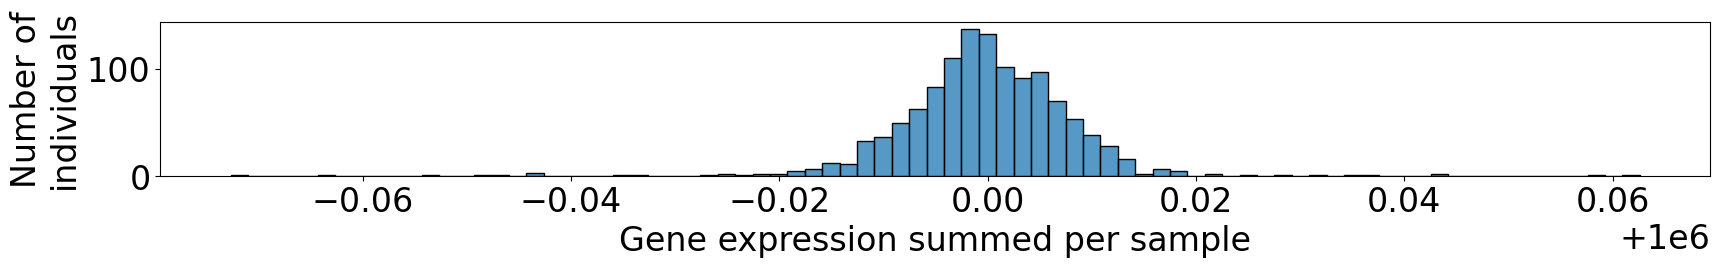

In [5]:
describe_gene_expression(2**X - 1, log_scale=False)

On average, in each sample, half the genes have an expression equal to 0.

There are 0 genes whose average expression is 0.


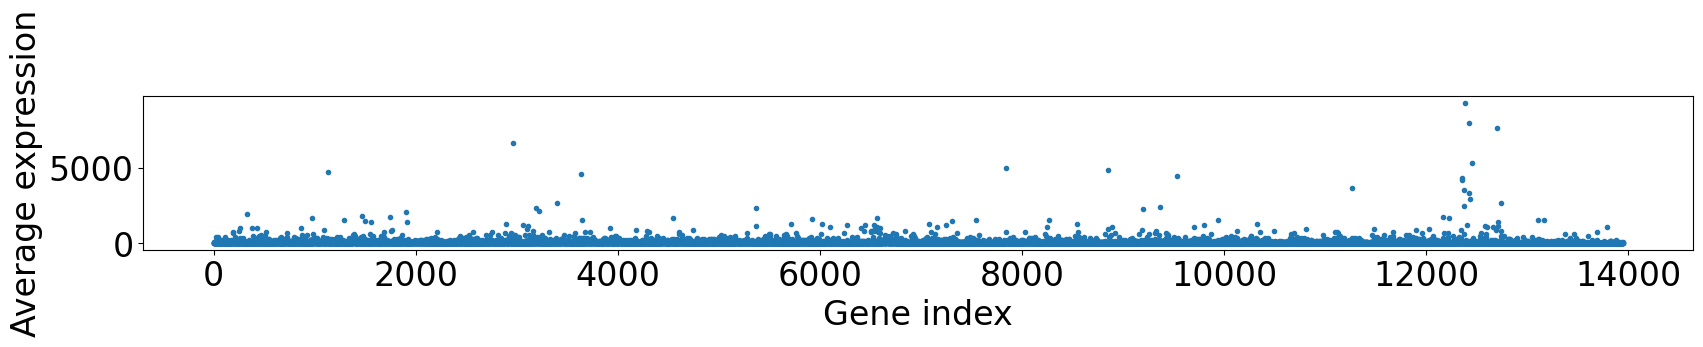

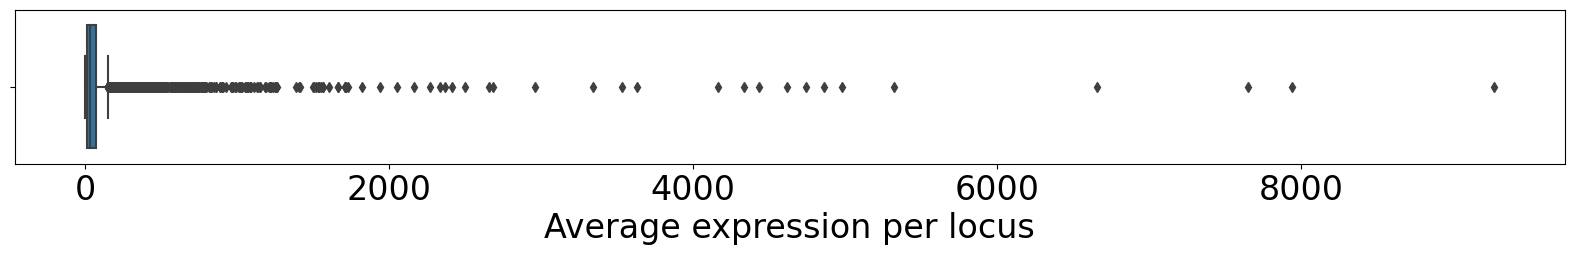

In [6]:
# criteria = 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(2**X - 1, criteria='average')

There are 1 genes whose median expression is 0.


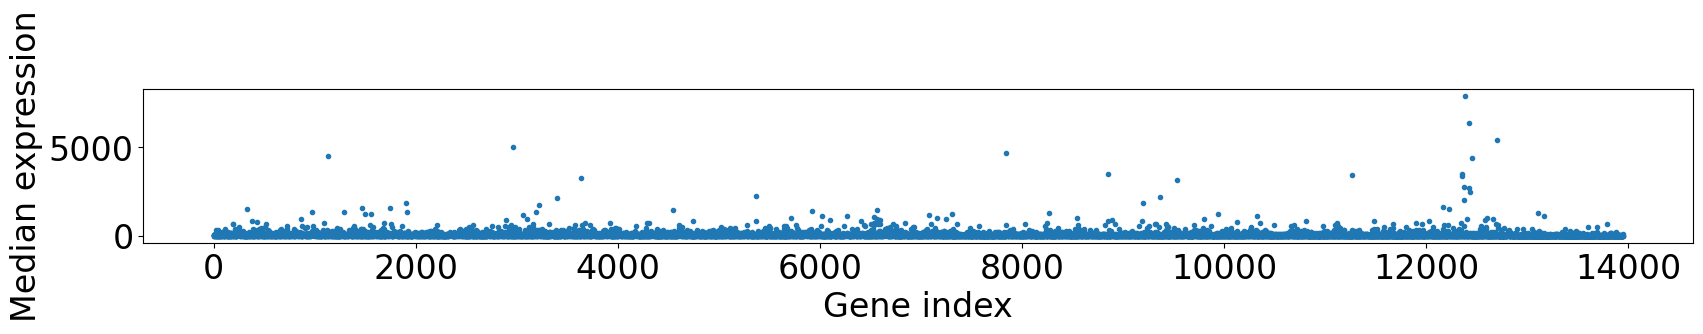

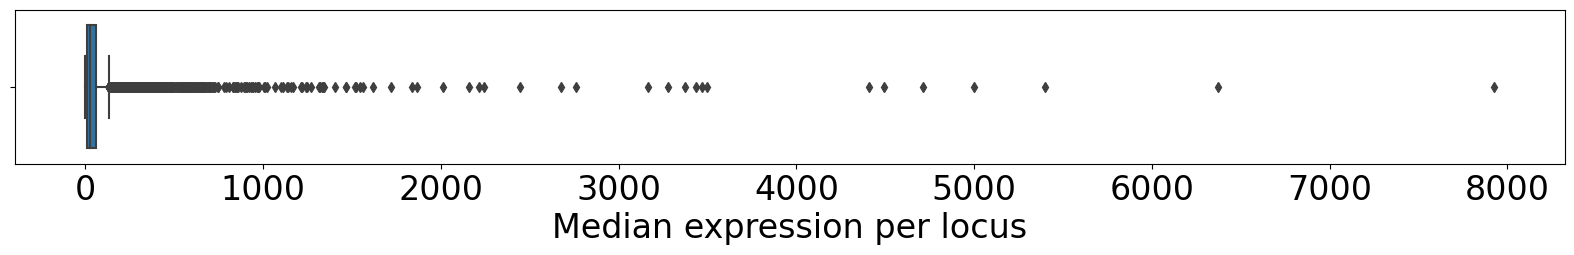

In [7]:
plot_stats_on_gene_expression(2**X - 1, criteria='median')

There are 0 genes whose maximum is 0.


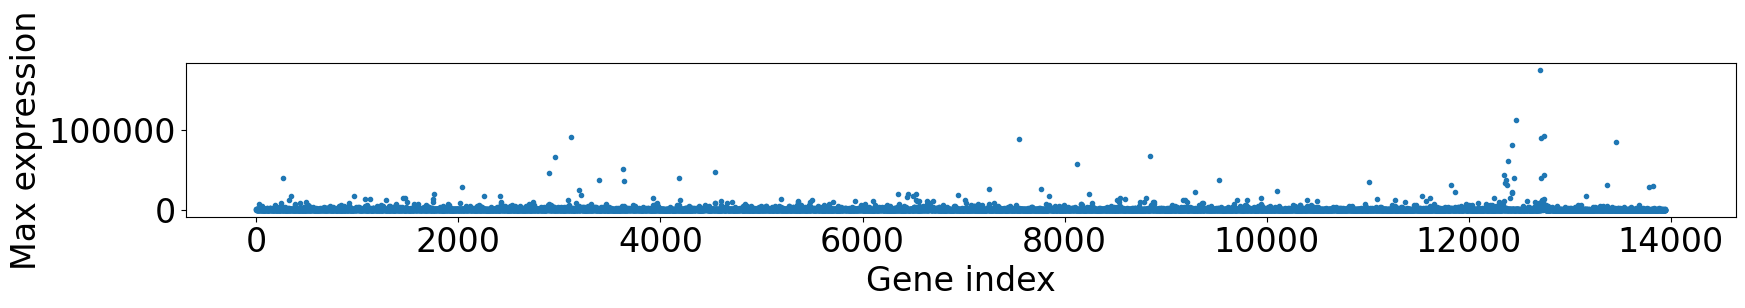

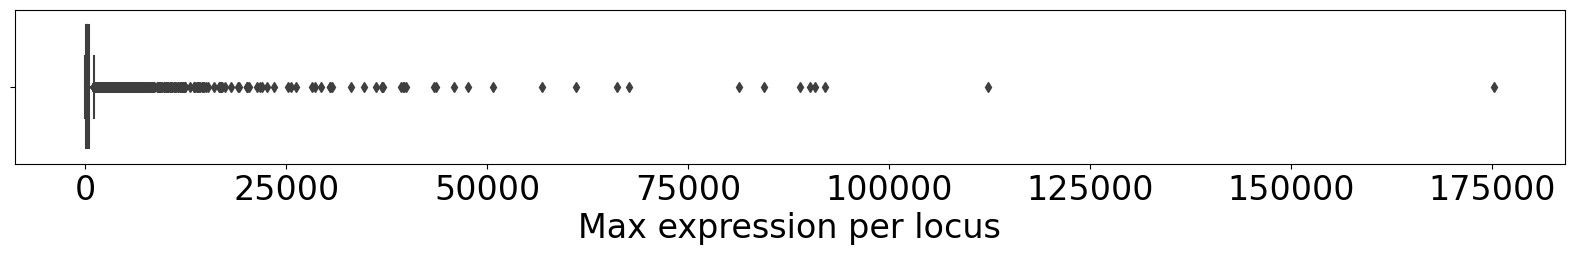

In [8]:
plot_stats_on_gene_expression(2**X - 1, criteria='max')

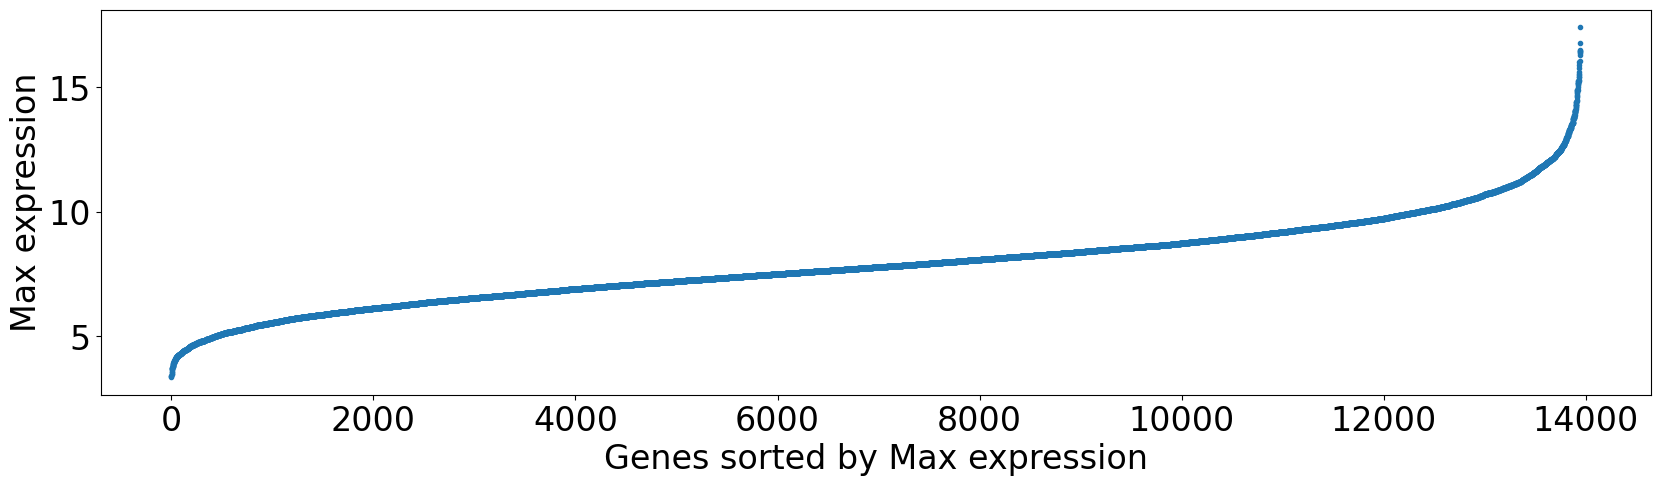

In [9]:
ordered_genes = sort_genes(X, criteria='max') # 'average', 'median', 'std', 'min', 'max'

Some genes have very high medians. They are often very active. Some genes are always expressed very weakly.

### Analysis of a gene

In [10]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array(feat_name) == 'ENSG00000000003.13')

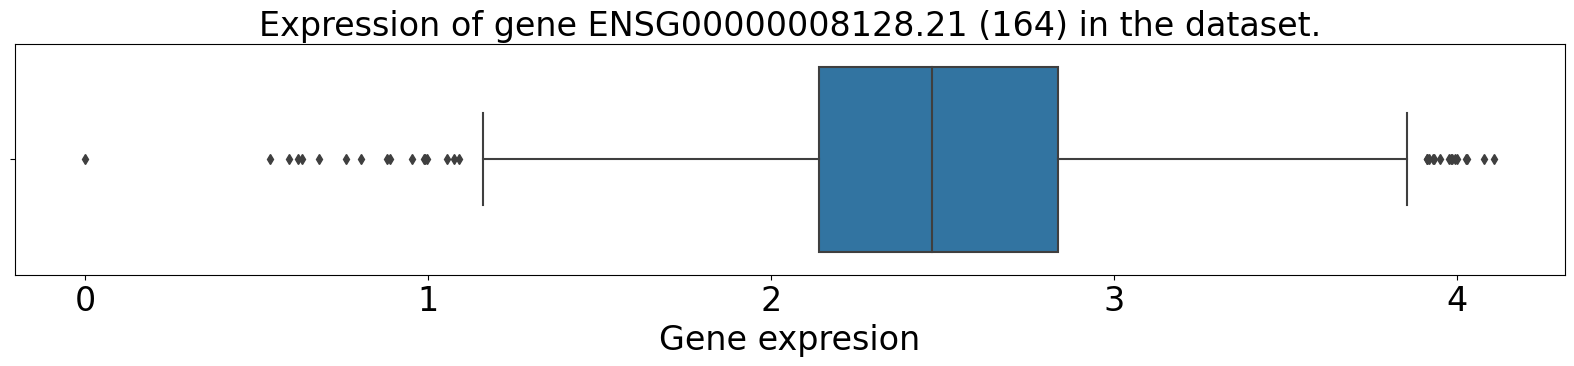

In [11]:
plot_random_gene_expression(X, y, feat_name, class_name, group_by_classes=False, gene_index=164)

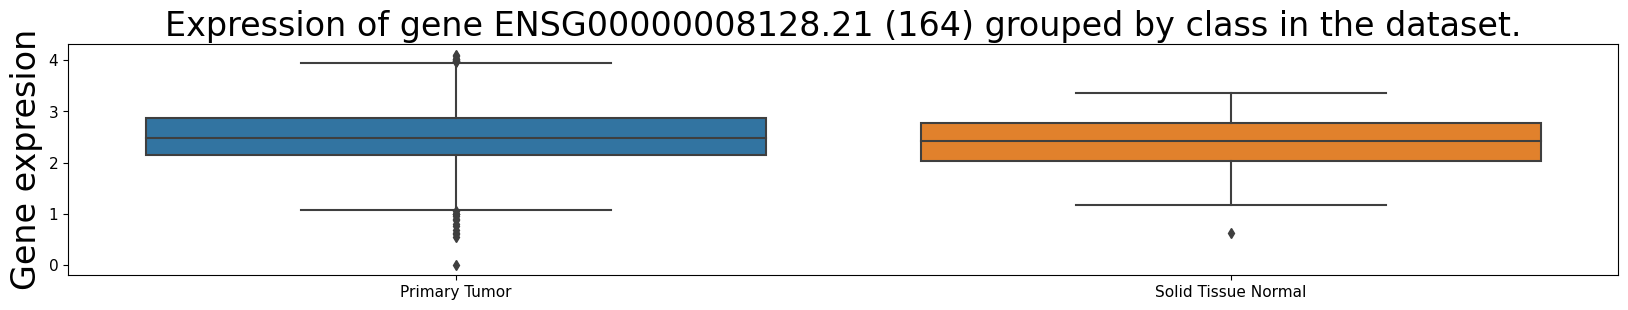

In [12]:
plot_random_gene_expression(X, y, feat_name, class_name, group_by_classes=True, gene_index=164)

### Analysis of a sample

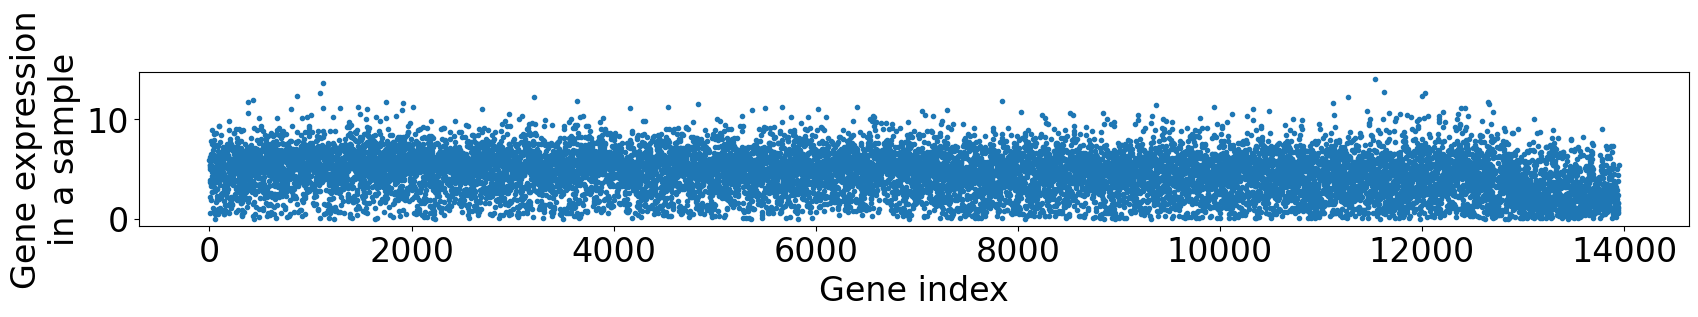

In [13]:
plot_random_sample_expression(X, index=27)

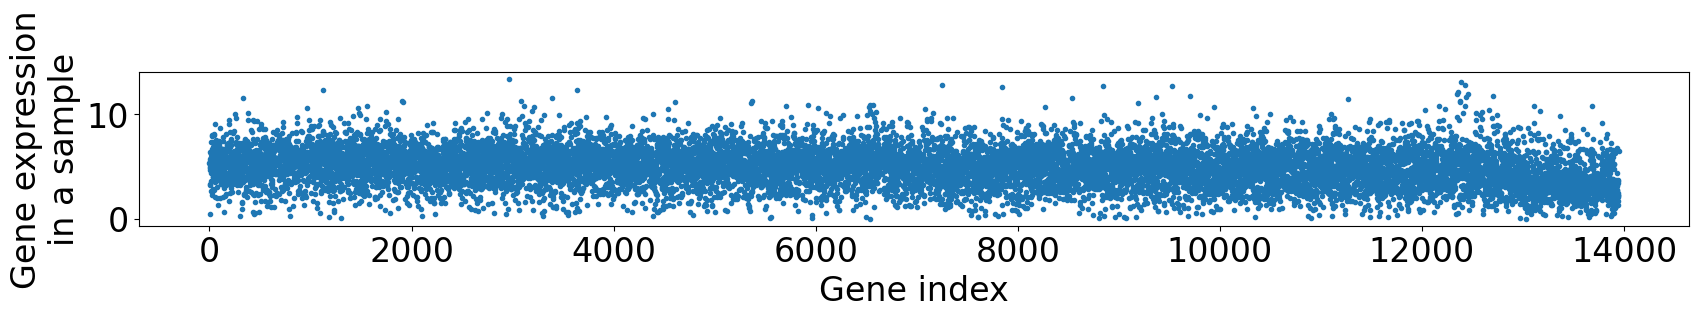

In [14]:
plot_random_sample_expression(X, index=31)